In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [ ]:

import requests
"""
https://bl.digirati.io/images/v3/ark:/81055/vdc_100157250589.0x000001/200,0,3320,3000/3320,3000/0/default.jpg
"""
for i in range(0, 30001, 3320):
    url = f"https://bl.digirati.io/images/v3/ark:/81055/vdc_100157250589.0x000001/{i},0,3320,3000/3320,3000/0/default.jpg"
    response = requests.get(url)
    if response.status_code == 200:
        with open(f"image_{i}.jpg", "wb") as f:
            f.write(response.content)



In [13]:
from PIL import Image
import os

images = [Image.open(f"image_{i}.jpg") for i in range(0, 30001, 3320) if os.path.exists(f"image_{i}.jpg")]
if images:
    combined = Image.new('RGB', (sum(im.width for im in images), max(im.height for im in images)))
    x_offset = 0
    for im in images:
        combined.paste(im, (x_offset, 0))
        x_offset += im.width
    combined.save('combined_image.jpg')


## Split into pages

In [63]:
from PIL import Image
pages = [
    (0, 0, 1900, 3000),
    (1750, 0, 3500, 3000),
    (3400, 0, 5200, 3000),
    (5100, 0, 6800, 3000),
    (6700, 0, 8400, 3000),
    (8300, 0, 10100, 3000),
    (10100, 0, 11800, 3000),
    (11700, 0, 13300, 3000),
    (13300, 0, 15000, 3000),
    (14900, 0, 16500, 3000),
    (16400, 0, 18000, 3000),
    (17900, 0, 19600, 3000),
    (19550, 0, 21200, 3000),
    (21100, 0, 22700, 3000),
    (22600, 0, 24400, 3000),
    (24200, 0, 25950, 3000),
]
img = Image.open("combined_image.jpg")
for i,region in enumerate(pages):
    res = img.crop(region)
    res.save(f"page{i+1}.jpg")


In [2]:
class RangeDict(dict):
    def __getitem__(self, item):
        if not isinstance(item, range): # or xrange in Python 2
            for key in self:
                if item in key:
                    return self[key]
            raise KeyError(item)
        else:
            return super().__getitem__(item) # or super(RangeDict, self) for Python 2

###  Page 1

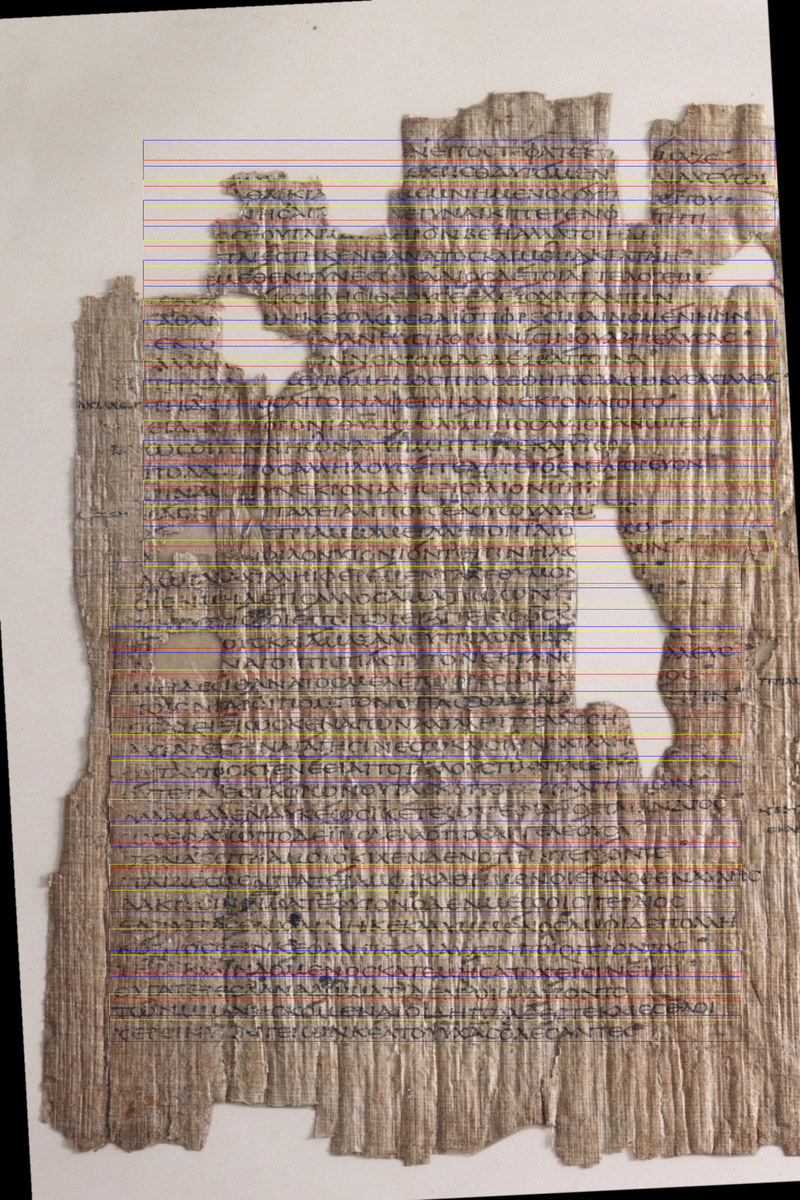

In [14]:
from PIL import Image, ImageDraw
import json

x_coords = RangeDict({
    range(126,148): 340,
    range(148,999): 260,
})
y_coord_increments = RangeDict({
    range(126,148): 50,
    range(148,999): 54,
})

image_path = "papyrus_pages/page1_rotated.jpg"
boxes = []
y = 300
for l in range(127,170):
    y += y_coord_increments[l]
    boxes += {"line": l, "image": image_path, "coords":{"x":x_coords[l],"y":y,"width":1500,"height":65}},

img = Image.open(image_path)
img1 = ImageDraw.Draw(img) 
colors = ["blue","red","yellow"]
for i, box in enumerate(boxes):
    coords = box["coords"]
    img1.rectangle([(coords["x"], coords["y"]), (coords["x"]+coords["width"], coords["y"] + coords["height"])], 
                   outline = colors[i%3])

with open("papyrus_pages/page1.json", "w") as f:
    json.dump(boxes, f,indent=4)

#display image
img.resize((800,1200), Image.Resampling.LANCZOS)

##  Page 2

In [343]:
from PIL import Image, ImageDraw, ImageFont, ImageColor
import json

colors = ["blue","red","yellow"]
def draw_boxes_on_papyrus(PAGE_NUMBER, LINE_START, LINE_END, Y_START, x_coords, y_coord_increments, widths, heights, suffix=""):
    image_path = f"papyrus_pages/page{PAGE_NUMBER}{suffix}.jpg"
    boxes = []
    y = Y_START
    for l in range(LINE_START, LINE_END):
        y += y_coord_increments[l]
        boxes += {"line": l, "image": image_path, "coords":{"x":x_coords[l],"y":y,"width":widths[l],"height":heights[l]}},

    img = Image.open(image_path)
    img1 = ImageDraw.Draw(img,mode="RGBA") 
    colors = ["blue","red","yellow"]
    fnt = ImageFont.truetype("../GFSDidot.ttf", 40)
    for i, box in enumerate(boxes):
        coords = box["coords"]
        color_tuple = ImageColor.getrgb(colors[i%3])
        img1.rectangle([(coords["x"], coords["y"]), (coords["x"]+coords["width"], coords["y"] + coords["height"])], 
                       outline = color_tuple, fill = color_tuple + (45,))
        img1.text((coords["x"]-90, coords["y"]), str(box["line"]), font=fnt, fill=colors[i%3])

    with open(f"papyrus_pages/page{PAGE_NUMBER}.json", "w") as f:
        json.dump(boxes, f,indent=4)

    #display image
    return img.resize((200,600), Image.Resampling.LANCZOS)

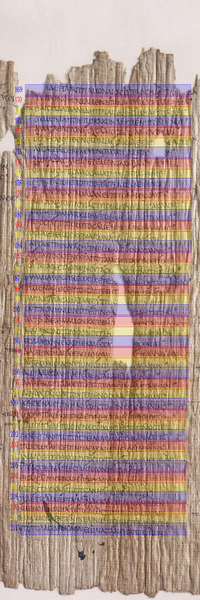

In [344]:
PAGE_NUMBER = 2
Y_START = 370
LINE_START = 169
LINE_END = 212
x_coords = RangeDict({
    range(LINE_START,186): 220,
    range(186,198): 200,
    range(198,LINE_END): 180,
})
y_coord_increments = RangeDict({
    range(LINE_START,186): 52,
    range(186,187): 60,
    range(187,LINE_END): 52,
})
widths = RangeDict({
    range(LINE_START,LINE_END): 1450,
})
heights = RangeDict({
    range(LINE_START,LINE_END): 60,
})
draw_boxes_on_papyrus(PAGE_NUMBER,  LINE_START, LINE_END, Y_START, x_coords, y_coord_increments, widths, heights)



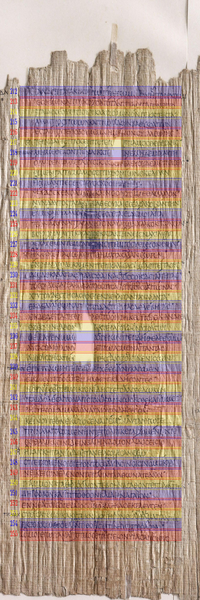

In [345]:
PAGE_NUMBER = 3
Y_START = 380
LINE_START = 212
LINE_END = 256
x_coords = RangeDict({
    range(LINE_START,186): 220,
    range(186,198): 200,
    range(198,LINE_END): 180,
})
y_coord_increments = RangeDict({
    range(LINE_START,245): 51,
    range(245,246): 70,
    range(246,LINE_END): 51,
})
widths = RangeDict({
    range(LINE_START,LINE_END): 1450,
})
heights = RangeDict({
    range(LINE_START,LINE_END): 60,
})
draw_boxes_on_papyrus(PAGE_NUMBER,  LINE_START, LINE_END, Y_START, x_coords, y_coord_increments, widths, heights)



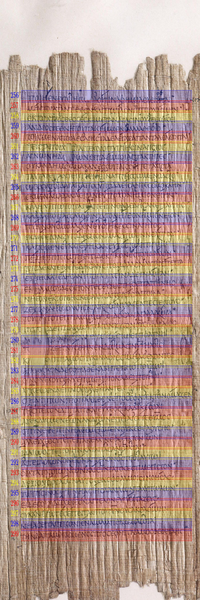

In [346]:
PAGE_NUMBER = 4
Y_START = 400
LINE_START = 256
LINE_END = 300
x_coords = RangeDict({
    range(LINE_START,186): 220,
    range(186,198): 200,
    range(198,LINE_END): 180,
})
y_coord_increments = RangeDict({
    range(LINE_START,245): 51,
    range(245,246): 70,
    range(246,LINE_END): 51,
})
widths = RangeDict({
    range(LINE_START,LINE_END): 1450,
})
heights = RangeDict({
    range(LINE_START,LINE_END): 60,
})
draw_boxes_on_papyrus(PAGE_NUMBER,  LINE_START, LINE_END, Y_START, x_coords, y_coord_increments, widths, heights)



In [347]:
class DefaultRangeDict(dict):
    def __init__(self, dictionary, default_value):
        super().__init__(dictionary)
        self.default = default_value
    def __getitem__(self, item):
        if not isinstance(item, range): # or xrange in Python 2
            for key in self:
                if item in key:
                    return self[key]
            return self.default
        else:
            return super().__getitem__(item) # or super(RangeDict, self) for Python 2

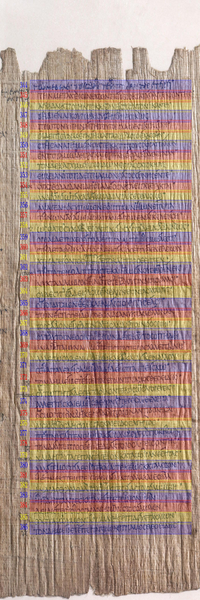

In [348]:
PAGE_NUMBER = 6
SUFFIX = ""
Y_START = 350
LINE_START = 344
LINE_END = 387
x_coords = RangeDict({
    range(LINE_START,LINE_END): 270,
})
y_coord_increments = DefaultRangeDict({
    range(359,360): 60,
    range(363,366): 60,
    range(369,370): 60,
    range(372,376): 60,
    range(379,380): 60,
    range(385,386): 60,
},50)
widths = RangeDict({
    range(LINE_START,LINE_END): 1450,
})
heights = RangeDict({
    range(LINE_START,LINE_END): 60,
})
draw_boxes_on_papyrus(PAGE_NUMBER,  LINE_START, LINE_END, Y_START, x_coords, y_coord_increments, widths, heights,suffix=SUFFIX)



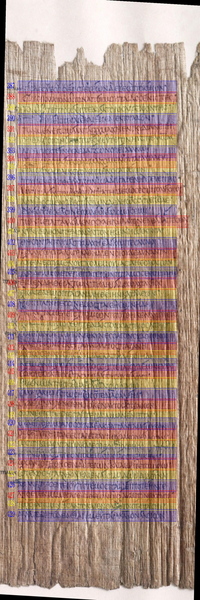

In [349]:
PAGE_NUMBER = 7
SUFFIX = "_rotated"
Y_START = 350
LINE_START = 387
LINE_END = 430
x_coords = RangeDict({
    range(LINE_START,LINE_END): 150,
})
y_coord_increments = DefaultRangeDict({
    range(394,396): 40,
    range(405,406): 40,
    range(413,416): 40,
    range(420,421): 40,
    range(423,424): 40,
    range(428,429): 40,
},54)
widths = DefaultRangeDict({
    range(397,398): 1400,
    range(400,401): 1450,
},1350)
heights = DefaultRangeDict({
    range(394,396): 70,
    range(422,423): 70,
},60)
draw_boxes_on_papyrus(PAGE_NUMBER,  LINE_START, LINE_END, Y_START, x_coords, y_coord_increments, widths, heights, suffix=SUFFIX)



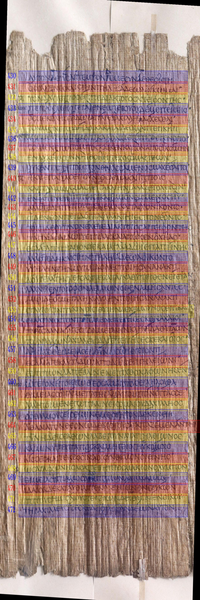

In [350]:
PAGE_NUMBER = 8
SUFFIX = "_rotated"
Y_START = 300
LINE_START = 430
LINE_END = 473
x_coords = RangeDict({
    range(LINE_START,LINE_END): 150,
})
y_coord_increments = DefaultRangeDict({
    range(436,439): 45,
    range(442,447): 45,
    range(454,456): 45,
    range(469,470): 45,
},54)
widths = DefaultRangeDict({
    range(453,454): 1400,
    range(464,465): 1500,
},1350)
heights = DefaultRangeDict({
},62)
draw_boxes_on_papyrus(PAGE_NUMBER,  LINE_START, LINE_END, Y_START, x_coords, y_coord_increments, widths, heights, suffix=SUFFIX)



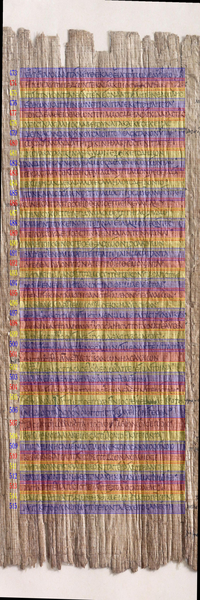

In [351]:
PAGE_NUMBER = 9
SUFFIX = "_rotated"
Y_START = 290
LINE_START = 473
LINE_END = 516
x_coords = RangeDict({
    range(LINE_START,LINE_END): 170,
})
y_coord_increments = DefaultRangeDict({
    range(436,439): 45,
    range(442,447): 45,
    range(454,456): 45,
    range(469,470): 45,
    range(499,500): 55,
    range(502,503): 65,
    range(506,509): 65,
},50)
widths = DefaultRangeDict({
    range(453,454): 1400,
    range(464,465): 1500,
},1400)
heights = DefaultRangeDict({
},62)
draw_boxes_on_papyrus(PAGE_NUMBER,  LINE_START, LINE_END, Y_START, x_coords, y_coord_increments, widths, heights, suffix=SUFFIX)



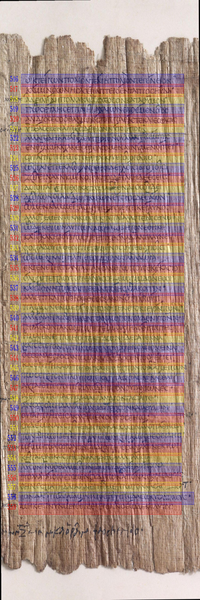

In [352]:
PAGE_NUMBER = 10
SUFFIX = "_rotated"
Y_START = 320
LINE_START = 516
LINE_END = 560
x_coords = DefaultRangeDict({
    range(552,560): 150,
},170)
y_coord_increments = DefaultRangeDict({
    range(522,523): 45,
    range(557,558): 45,
},50)
widths = DefaultRangeDict({
    range(558,559): 1400,
},1300)
heights = DefaultRangeDict({
},62)
draw_boxes_on_papyrus(PAGE_NUMBER,  LINE_START, LINE_END, Y_START, x_coords, y_coord_increments, widths, heights, suffix=SUFFIX)



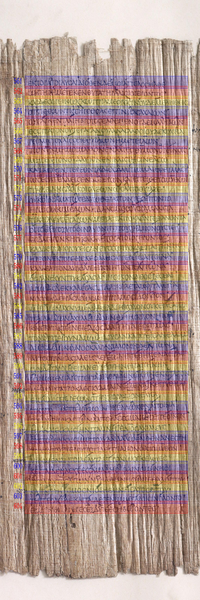

In [353]:
PAGE_NUMBER = 11
SUFFIX = ""
Y_START = 330
LINE_START = 561
LINE_END = 605
x_coords = DefaultRangeDict({
    range(552,560): 150,
},200)
y_coord_increments = DefaultRangeDict({
    range(569,572): 45,
    range(579,581): 45,
},50)
widths = DefaultRangeDict({
    range(558,559): 1400,
},1300)
heights = DefaultRangeDict({
},62)
draw_boxes_on_papyrus(PAGE_NUMBER,  LINE_START, LINE_END, Y_START, x_coords, y_coord_increments, widths, heights, suffix=SUFFIX)



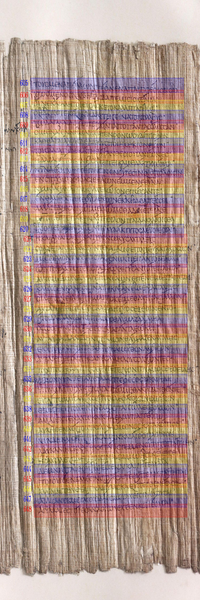

In [354]:
PAGE_NUMBER = 12
SUFFIX = ""
Y_START = 340
LINE_START = 605
LINE_END = 649
x_coords = DefaultRangeDict({
    range(621,LINE_END): 290,
},260)
y_coord_increments = DefaultRangeDict({
    range(606,607): 60,
    range(611,614): 40,
    range(579,581): 45,
},50)
widths = DefaultRangeDict({
    range(558,559): 1400,
},1300)
heights = DefaultRangeDict({
    range(605,606): 72,
    range(609,610): 60,
    range(611,614): 70,
},65)
draw_boxes_on_papyrus(PAGE_NUMBER,  LINE_START, LINE_END, Y_START, x_coords, y_coord_increments, widths, heights, suffix=SUFFIX)



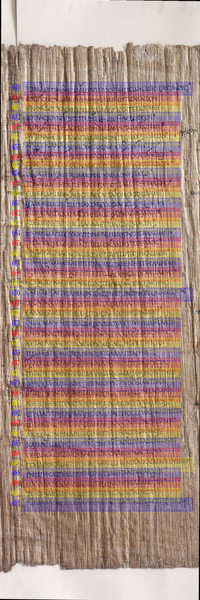

In [355]:
PAGE_NUMBER = 13
SUFFIX = "_rotated"
Y_START = 360
LINE_START = 649
LINE_END = 692
x_coords = DefaultRangeDict({
},190)
y_coord_increments = DefaultRangeDict({
    range(657,659): 40,
},50)
widths = DefaultRangeDict({
    range(649,650): 1400,
    range(670,671): 1400,
    range(687,688): 1400,
    range(691,692): 1400,
},1300)
heights = DefaultRangeDict({
    range(605,606): 72,
    range(609,610): 60,
    range(611,614): 70,
},65)
draw_boxes_on_papyrus(PAGE_NUMBER,  LINE_START, LINE_END, Y_START, x_coords, y_coord_increments, widths, heights, suffix=SUFFIX)



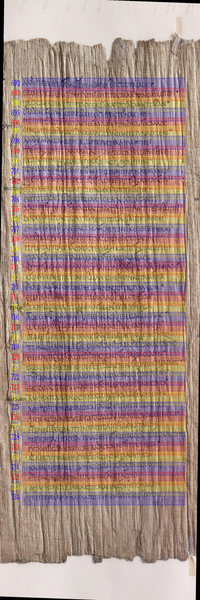

In [356]:
PAGE_NUMBER = 14
SUFFIX = "_rotated"
Y_START = 340
LINE_START = 692
LINE_END = 735
x_coords = DefaultRangeDict({
},180)
y_coord_increments = DefaultRangeDict({
    range(697,698): 40,
    range(704,705): 40,
    range(711,712): 40,
},50)
widths = DefaultRangeDict({
},1300)
heights = DefaultRangeDict({
},65)
draw_boxes_on_papyrus(PAGE_NUMBER,  LINE_START, LINE_END, Y_START, x_coords, y_coord_increments, widths, heights, suffix=SUFFIX)



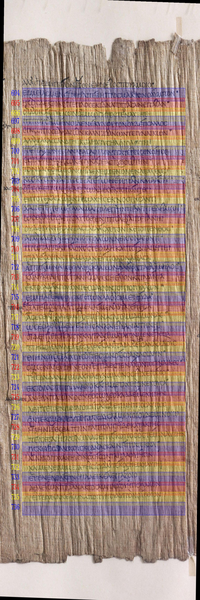

In [357]:
PAGE_NUMBER = 14
SUFFIX = "_rotated"
Y_START = 390
LINE_START = 694
LINE_END = 737
x_coords = DefaultRangeDict({
},180)
y_coord_increments = DefaultRangeDict({
    range(697,698): 40,
    range(704,705): 40,
    range(711,712): 40,
},50)
widths = DefaultRangeDict({
},1300)
heights = DefaultRangeDict({
},65)
draw_boxes_on_papyrus(PAGE_NUMBER,  LINE_START, LINE_END, Y_START, x_coords, y_coord_increments, widths, heights, suffix=SUFFIX)



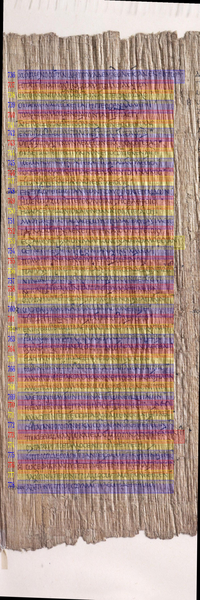

In [358]:
PAGE_NUMBER = 15
SUFFIX = "_rotated"
Y_START = 300
LINE_START = 736
LINE_END = 779
x_coords = DefaultRangeDict({
},160)
y_coord_increments = DefaultRangeDict({
    range(742,743): 40,
    range(747,748): 40,
    range(758,759): 40,
    range(768,769): 40,
    range(770,771): 40,
},50)
widths = DefaultRangeDict({
    range(736,737): 1500,
    range(753,754): 1500,
    range(773,774): 1500,
},1400)
heights = DefaultRangeDict({
},65)
draw_boxes_on_papyrus(PAGE_NUMBER,  LINE_START, LINE_END, Y_START, x_coords, y_coord_increments, widths, heights, suffix=SUFFIX)



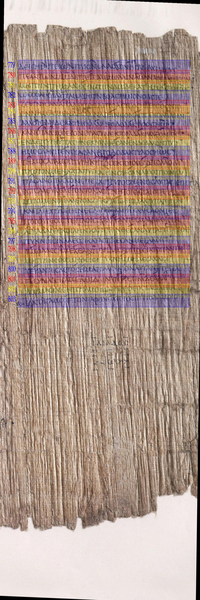

In [359]:
PAGE_NUMBER = 16
SUFFIX = "_rotated"
Y_START = 250
LINE_START = 779
LINE_END = 804
x_coords = DefaultRangeDict({
},160)
y_coord_increments = DefaultRangeDict({
    range(784,785): 30,
    range(798,799): 40,
},50)
widths = DefaultRangeDict({
    range(736,737): 1500,
},1500)
heights = DefaultRangeDict({
},65)
draw_boxes_on_papyrus(PAGE_NUMBER,  LINE_START, LINE_END, Y_START, x_coords, y_coord_increments, widths, heights, suffix=SUFFIX)

